In [1]:
#import the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, auc)
import joblib

In [7]:
# 📥 Load Dataset
df = pd.read_csv("C:\\Users\\91992\\OneDrive\\Desktop\\Project\\personality_dataset.csv")

# Display first few rows
print(df.head())

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [8]:
# Check for missing values
print("Missing values:\n",df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Missing values:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [9]:
label_encoders = {}
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"⚠️ Warning: Column '{col}' not found in DataFrame.")

# 🔍 Optional: Show updated DataFrame
print("\nPreview of Encoded Data:")
print(df.head())



Preview of Encoded Data:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  


In [10]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()

# ✅ Step 4: Define Features and Target
features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside',
            'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']
X= df[features]
y = df['Personality']
print("✅ Feature matrix and target successfully defined.")

['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']
✅ Feature matrix and target successfully defined.


Feature shape: (2477, 7)
Target shape: (2477,)


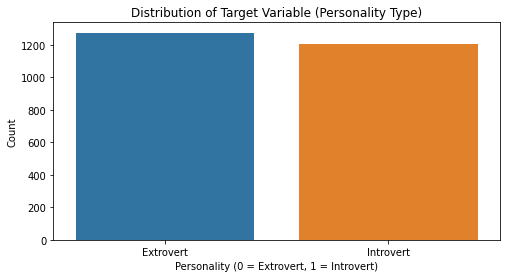

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Feature & Target Split
X = df.drop('Personality', axis=1)
y = df['Personality']  # Encoded as 0 = Extrovert, 1 = Introvert

# ✅ Confirm Shapes
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 🎯 Plot Target Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title("Distribution of Target Variable (Personality Type)")
plt.xlabel("Personality (0 = Extrovert, 1 = Introvert)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Extrovert', 'Introvert'])
plt.show()


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print("✅ Preprocessing complete.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

✅ Preprocessing complete.
Training set shape: (1981, 7)
Testing set shape: (496, 7)


In [15]:
# ✅ Make predictions on the test set
y_pred = model.predict(X_test_scaled)
#✅ Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))


Accuracy: 0.9274



📊 Confusion Matrix:
[[223  23]
 [ 13 237]]


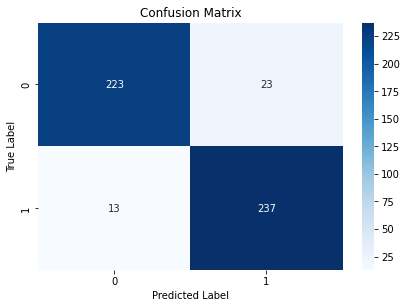

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix and classification report
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📝 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       246
           1       0.91      0.95      0.93       250

    accuracy                           0.93       496
   macro avg       0.93      0.93      0.93       496
weighted avg       0.93      0.93      0.93       496



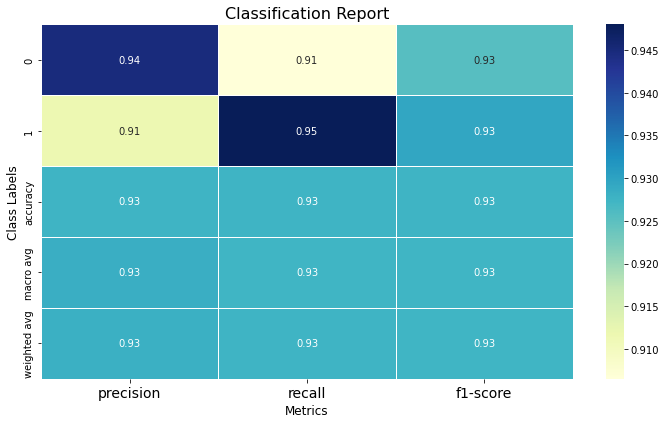

In [18]:
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))
# Assuming `report` is already created using classification_report(..., output_dict=True)
# ✅ Get report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
# ✅ Convert to DataFrame and clean
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Remove 'accuracy' row for cleaner view

# 📊 Large, standalone Classification Report plot
plt.figure(figsize=(10, 6))  # Increase size here
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar=True)

plt.title("Classification Report", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Class Labels", fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

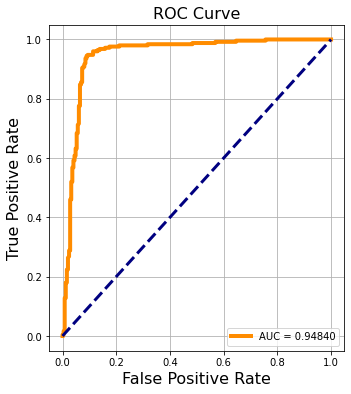

In [20]:
# ✅ Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(18, 6))
roc_auc = auc(fpr, tpr)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=4, label=f"AUC = {roc_auc:.5f}")
plt.plot([0, 1], [0, 1], color='navy', lw=3,linestyle='--')
plt.title('ROC Curve',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)

In [21]:
# Save model and scaler
joblib.dump(model, 'personality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model trained and saved as personality_model.pkl and scaler.pkl")

✅ Model trained and saved as personality_model.pkl and scaler.pkl
